In [2]:
import pandas as pd 
import requests 
import os  
import tweepy as tw
from tweepy import OAuthHandler 
import json 
from timeit import default_timer as timer 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [6]:
df_csv=pd.read_csv('twitter-archive-enhanced.csv')

folder_name='upload'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response

<Response [200]>

In [7]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)
os.listdir(folder_name)

['image-predictions.tsv']

In [8]:
df_tsv=pd.read_csv('upload/image-predictions.tsv',sep='\t')

setting twitter connection 

In [3]:
consumer_key= '51usEwLPw70bh1r7ICpO4wPja'
consumer_secret= 'q608rlwd6hahdzxIrD0ZMeJ2WZb63bfcShI9HZlbFLGoWGDlpb'
access_token= '1369803381246689280-IHIjzTPwiR9zyELMF6hmjqNY2QOMOp'
access_token_secret= 'RwntbnxOivFAXNOWVOS76LK6L01LMnPqPyT4nQMhqs6Na'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
#using tweets id from twitter-archive-enhanced.csv file to extract data
tweets_id=df_csv['tweet_id'].values
len(tweets_id)

2356

getting and storing tweets in json

In [ ]:
fails_dict = {}
count=0
start=timer()
print(start)
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweets_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            print('successed')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.TweepError as e:
            print('failed')
            fails_dict[tweet_id] = e
            pass
end=timer()
print(end-start)
print(fails_dict)

In [13]:
#reading tweets keys
data[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

reading and storing retweets and favorites counts for each tweet in dataframe

In [4]:
with open('tweet_json.txt') as f:
    data=[json.loads(line) for line in f]
#     data = data[0]
data_list=[]  
for item in data:
    tweet_id=item['id']
    retweets=item['retweet_count']
    favorites=item['favorite_count']
    data_list.append({'tweet_id':tweet_id,'retweets':retweets,'favorites':favorites})
df_tweets = pd.DataFrame(data_list, columns = ['tweet_id', 'retweets', 'favorites'])
df_tweets

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Assessing

In [4]:
df_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [90]:
df_csv['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [34]:
df_csv['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [89]:
df_csv['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Bailey        7
Buddy         7
Toby          7
an            7
Daisy         7
Stanley       6
Dave          6
Rusty         6
Leo           6
Jax           6
Milo          6
Scout         6
Jack          6
Bella         6
Koda          6
Oscar         6
Gus           5
           ... 
Strudel       1
Pubert        1
Ginger        1
Ulysses       1
Jett          1
Rilo          1
Dylan         1
Ito           1
Aubie         1
Florence      1
Mabel         1
Rodman        1
Caryl         1
Zoe           1
Arlen         1
Holly         1
Jareld        1
Miley         1
Joey          1
Frönq         1
Franq         1
Lucky         1
Sky           1
Ambrose       1
Eazy          1
Mojo          1
Rupert        1
O             1
Ashleigh      1
Chesney       1
Name: name, Length: 957,

In [67]:
df_csv.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [92]:
df_tweets.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [69]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [68]:
df_tweets.describe()

,tweet_id,retweets,favorites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [14]:
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
df_tsv.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01





quality issues

*archive

  .tweet_id to object

  .in_reply_to_status_id to object

  .in_reply_to_user_id  to object

  .timestamp to datetime

  .retweeted_status_timestamp to datetime

  .none values in name and wrong names

  

*image prediction


  .tweet_id to object
  
  

*in tweet


  .tweet_id to object
  
  

tiddeness issues

  .melting doggo ,floofer ,pupper ,puppo in one column change to category

  .merging 3 dataframes 
  
  .cleaning far values of rating_numerator that count 1 with mean value and using as rating 

# cleaning

In [9]:
archive_clean=df_csv.copy()
prediction_clean=df_tsv.copy()
tweet_clean=df_tweets.copy()

In [11]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
archive_clean.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
archive_clean.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
archive_clean.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
archive_clean.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [64]:
archive_clean.tweet_id.duplicated().sum()

0

394 not none values

In [10]:
list=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'retweeted_status_id', 'retweeted_status_user_id']
for i in list :
    archive_clean[i]=archive_clean[i].astype(str)
time='timestamp','retweeted_status_timestamp'



In [11]:
time=['timestamp','retweeted_status_timestamp']
for t in time:
    archive_clean[t]=pd.to_datetime(archive_clean[t])

In [10]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [12]:
ids=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name']
values=['doggo', 'floofer', 'pupper', 'puppo']
          
archive_clean=pd.melt(archive_clean,id_vars=ids,value_name='dogtionary')
archive_clean=archive_clean.drop('variable',axis=1)
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogtionary
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,None
9420,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,a,None
9421,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,a,None
9422,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,a,None


In [88]:
archive_clean.tweet_id.duplicated().sum()

7068

solving melt duplication problem

In [13]:
#removing duplicates in tweet_id and dogtionary 2 duplicates of 3 
df_drop=archive_clean.drop_duplicates(subset=['tweet_id','dogtionary'])

In [26]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 14 columns):
tweet_id                      2750 non-null object
in_reply_to_status_id         2750 non-null object
in_reply_to_user_id           2750 non-null object
timestamp                     2750 non-null datetime64[ns]
source                        2750 non-null object
text                          2750 non-null object
retweeted_status_id           2750 non-null object
retweeted_status_user_id      2750 non-null object
retweeted_status_timestamp    219 non-null datetime64[ns]
expanded_urls                 2685 non-null object
rating_numerator              2750 non-null int64
rating_denominator            2750 non-null int64
name                          2750 non-null object
dogtionary                    2750 non-null object
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 322.3+ KB


In [14]:
df_drop.duplicated(subset='tweet_id',keep=False).sum()

774

In [15]:
#duplicated in tweet_id
df_drop2=df_drop[df_drop.duplicated(subset='tweet_id',keep=False)]

In [35]:
df_drop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 9 to 8151
Data columns (total 14 columns):
tweet_id                      774 non-null object
in_reply_to_status_id         774 non-null object
in_reply_to_user_id           774 non-null object
timestamp                     774 non-null datetime64[ns]
source                        774 non-null object
text                          774 non-null object
retweeted_status_id           774 non-null object
retweeted_status_user_id      774 non-null object
retweeted_status_timestamp    74 non-null datetime64[ns]
expanded_urls                 762 non-null object
rating_numerator              774 non-null int64
rating_denominator            774 non-null int64
name                          774 non-null object
dogtionary                    774 non-null object
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 90.7+ KB


In [36]:
df_drop2.dogtionary.value_counts()

None       380
pupper     257
doggo       97
puppo       30
floofer     10
Name: dogtionary, dtype: int64

In [16]:
#filtering != none values
df3=df_drop2[df_drop2.dogtionary !='None']

In [17]:
#droping duplicated tweet_id 
df_drop=df_drop.drop_duplicates(subset='tweet_id',keep=False)

In [18]:
#merging data of non- duplicated values 
df_merge=df_drop.append(df3)

In [40]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 8151
Data columns (total 14 columns):
tweet_id                      2370 non-null object
in_reply_to_status_id         2370 non-null object
in_reply_to_user_id           2370 non-null object
timestamp                     2370 non-null datetime64[ns]
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           2370 non-null object
retweeted_status_user_id      2370 non-null object
retweeted_status_timestamp    183 non-null datetime64[ns]
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          2370 non-null object
dogtionary                    2370 non-null object
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 277.7+ KB


In [19]:
archive_clean=df_merge

In [44]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dogtionary'],
      dtype='object')

In [45]:
archive_clean.dogtionary.value_counts()

None       1976
pupper      257
doggo        97
puppo        30
floofer      10
Name: dogtionary, dtype: int64

In [20]:
archive_clean.dogtionary=archive_clean.dogtionary.astype("category")

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 8151
Data columns (total 14 columns):
tweet_id                      2370 non-null object
in_reply_to_status_id         2370 non-null object
in_reply_to_user_id           2370 non-null object
timestamp                     2370 non-null datetime64[ns]
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           2370 non-null object
retweeted_status_user_id      2370 non-null object
retweeted_status_timestamp    183 non-null datetime64[ns]
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          2370 non-null object
dogtionary                    2370 non-null category
dtypes: category(1), datetime64[ns](2), int64(2), object(9)
memory usage: 261.7+ KB


In [21]:
prediction_clean.tweet_id=prediction_clean.tweet_id.astype(str)

In [20]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [22]:
tweet_clean.tweet_id=tweet_clean.tweet_id.astype(str)

In [22]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   retweets   2354 non-null   int64 
 2   favorites  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


merging archive_clean,prediction_clean,tweet_clean and save in twitter_archive_master.csv

In [23]:
archive_clean=archive_clean.merge(tweet_clean,on='tweet_id',how='inner')

In [24]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,retweets,favorites
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,752519690950500352,nan,nan,2016-07-11 15:07:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,nan,nan,NaT,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo,3917,8157
2364,751132876104687617,nan,nan,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,nan,nan,NaT,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,1480,5610
2365,744995568523612160,nan,nan,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,nan,nan,NaT,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,716,3277
2366,743253157753532416,nan,nan,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,nan,nan,NaT,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,1366,4624


In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2367
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2368 non-null   object             
 1   in_reply_to_status_id       2368 non-null   object             
 2   in_reply_to_user_id         2368 non-null   object             
 3   timestamp                   2368 non-null   datetime64[ns, UTC]
 4   source                      2368 non-null   object             
 5   text                        2368 non-null   object             
 6   retweeted_status_id         2368 non-null   object             
 7   retweeted_status_user_id    2368 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2309 non-null   object             
 10  rating_numerator            2368 non-null   int64           

In [24]:
archive_clean=archive_clean.merge(prediction_clean,on='tweet_id',how='inner')

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 27 columns):
tweet_id                      2086 non-null object
in_reply_to_status_id         2086 non-null object
in_reply_to_user_id           2086 non-null object
timestamp                     2086 non-null datetime64[ns]
source                        2086 non-null object
text                          2086 non-null object
retweeted_status_id           2086 non-null object
retweeted_status_user_id      2086 non-null object
retweeted_status_timestamp    81 non-null datetime64[ns]
expanded_urls                 2086 non-null object
rating_numerator              2086 non-null int64
rating_denominator            2086 non-null int64
name                          2086 non-null object
dogtionary                    2086 non-null category
retweets                      2086 non-null int64
favorites                     2086 non-null int64
jpg_url                       2086 non-null object
img_num       

In [40]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaT,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890006608113172480,nan,nan,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,nan,nan,NaT,https://twitter.com/dog_rates/status/890006608...,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8292 entries, 0 to 8291
Data columns (total 27 columns):
tweet_id                      8292 non-null object
in_reply_to_status_id         8292 non-null object
in_reply_to_user_id           8292 non-null object
timestamp                     8292 non-null datetime64[ns]
source                        8292 non-null object
text                          8292 non-null object
retweeted_status_id           8292 non-null object
retweeted_status_user_id      8292 non-null object
retweeted_status_timestamp    316 non-null datetime64[ns]
expanded_urls                 8292 non-null object
rating_numerator              8292 non-null int64
rating_denominator            8292 non-null int64
name                          8292 non-null object
dogtionary                    8292 non-null category
retweets                      8292 non-null int64
favorites                     8292 non-null int64
jpg_url                       8292 non-null object
img_num      

In [25]:
master_df=archive_clean

In [58]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 27 columns):
tweet_id                      2086 non-null object
in_reply_to_status_id         2086 non-null object
in_reply_to_user_id           2086 non-null object
timestamp                     2086 non-null datetime64[ns]
source                        2086 non-null object
text                          2086 non-null object
retweeted_status_id           2086 non-null object
retweeted_status_user_id      2086 non-null object
retweeted_status_timestamp    81 non-null datetime64[ns]
expanded_urls                 2086 non-null object
rating_numerator              2086 non-null int64
rating_denominator            2086 non-null int64
name                          2086 non-null object
dogtionary                    2086 non-null category
retweets                      2086 non-null int64
favorites                     2086 non-null int64
jpg_url                       2086 non-null object
img_num       

In [42]:
master_df.favorites.isnull().sum()
master_df.retweets.isnull().sum()
master_df.tweet_id.isnull().sum()

0

In [79]:
master_df.rating_numerator.value_counts()

12      480
10      430
11      415
13      285
9       151
8        95
7        52
14       40
5        35
6        32
3        19
4        16
2         9
1         5
0         2
15        1
27        1
45        1
99        1
121       1
143       1
75        1
204       1
1776      1
420       1
144       1
88        1
84        1
80        1
60        1
50        1
44        1
26        1
24        1
165       1
Name: rating_numerator, dtype: int64

In [26]:
master_df.rating_numerator.describe().round()

count    2086.0
mean       12.0
std        41.0
min         0.0
25%        10.0
50%        11.0
75%        12.0
max      1776.0
Name: rating_numerator, dtype: float64

changing rating_numerator with average value 12 for all the rates that counts 1 and considering it as valuable rating data with max 14 

In [26]:
master_df.rating_numerator[master_df.rating_numerator>=15]=12

<ipython-input-26-f6aa9be52f66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df.rating_numerator[master_df.rating_numerator>=15]=12


In [27]:
file='twitter_archive_master.csv'
master_df.to_csv(file,index=False,encoding='utf-8')

# analysis and visualization 

In [61]:
master_df.describe()

,rating_numerator,rating_denominator,retweets,favorites,img_num,p1_conf,p2_conf,p3_conf
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2.086000e+03,2.086000e+03
mean,12.259827,10.508629,2996.142857,8588.632790,1.202780,0.595605,1.343709e-01,6.021256e-02
std,40.573214,7.158210,5072.233307,12122.309216,0.560585,0.271332,1.006290e-01,5.091786e-02
min,0.000000,2.000000,16.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,637.000000,1674.500000,1.000000,0.365109,5.333950e-02,1.606823e-02
50%,11.000000,10.000000,1423.000000,3897.500000,1.000000,0.590638,1.175870e-01,4.928135e-02
75%,12.000000,10.000000,3452.250000,10941.500000,1.000000,0.846896,1.955197e-01,9.186877e-02
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
master_df.favorites.median()

3897.5

In [30]:
master_df.retweets.median()

1423.0

In [47]:
master_df.favorites.describe().round()

count      2086.0
mean       8589.0
std       12122.0
min           0.0
25%        1674.0
50%        3898.0
75%       10942.0
max      132810.0
Name: favorites, dtype: float64

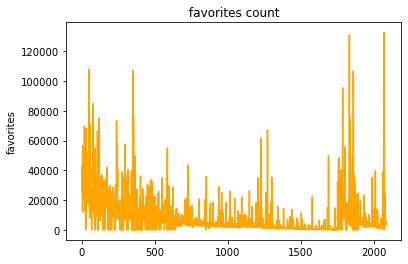

In [82]:
plt.title(' favorites count ')
sns.lineplot(data=df_plot.favorites,color='orange')
plt.savefig('favorites count_lineplot.png')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


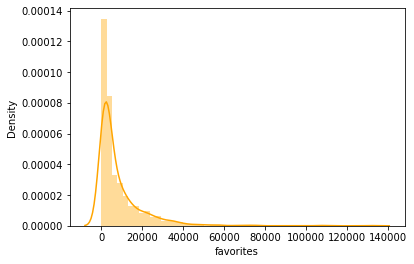

In [83]:
sns.distplot(master_df.favorites, color = 'orange', label = 'Favorites')

plt.savefig('favorites count_distplot.png')

In [45]:
master_df.retweets.describe().round()

count     2086.0
mean      2996.0
std       5072.0
min         16.0
25%        637.0
50%       1423.0
75%       3452.0
max      79515.0
Name: retweets, dtype: float64

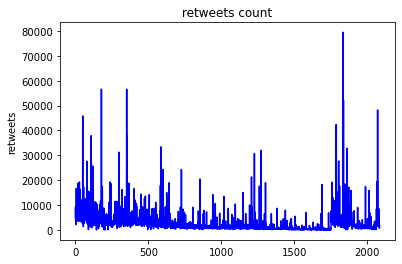

In [84]:
plt.title(' retweets count ')
sns.lineplot(data=df_plot.retweets,color='blue')
plt.savefig('retweets count_lineplot.png')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


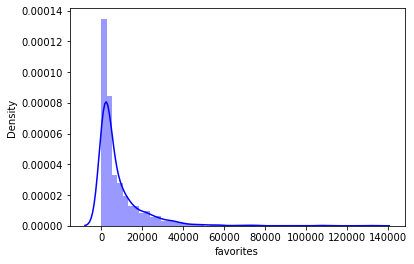

In [85]:
sns.distplot(master_df.favorites, color = 'blue', label = 'Favorites')
plt.savefig('retweets count_distplot.png')

In [32]:
df_plot=pd.DataFrame(columns=['retweets','favorites'])

In [33]:
df_plot['favorites']=master_df['favorites']

In [34]:
df_plot['retweets']=master_df['retweets']

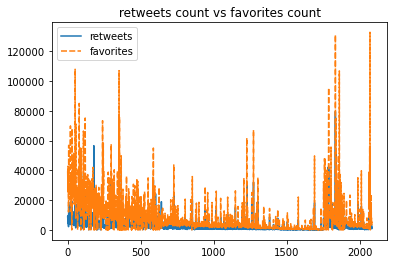

In [86]:
plt.title(' retweets count vs favorites count ')
sns.lineplot(data=df_plot)
plt.savefig('favorites vs retweet count_lineplot.png')

In [29]:
master_df.retweets.corr(master_df.favorites)

0.789512942862567

R value referes to very strong correlation between retweets count and favorites count 

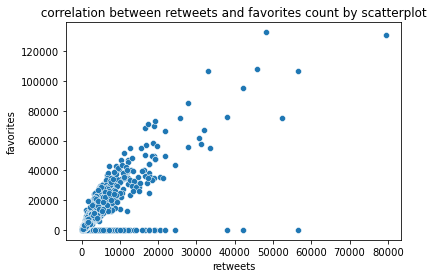

In [87]:
plt.title(' correlation between retweets and favorites count by scatterplot ')
sns.scatterplot(x=master_df.retweets,y=master_df.favorites)
plt.savefig('correlation_scatterplot.png')

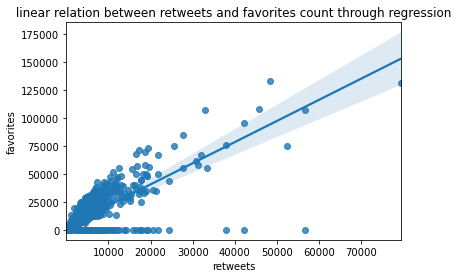

In [88]:
plt.title(' linear relation between retweets and favorites count through regression ')
sns.regplot(x=master_df.retweets,y=master_df.favorites)
plt.savefig('correlation_regplot.png')

adding line to scatterplot to determine the correlation strength 

In [61]:
master_df.rating_numerator.describe().round()

count    2086.0
mean       11.0
std         2.0
min         0.0
25%        10.0
50%        11.0
75%        12.0
max        14.0
Name: rating_numerator, dtype: float64

looking for correlations between given ratings and  count of retweeting and favoriting of posts 

In [62]:
master_df.rating_numerator.corr(master_df.favorites)

0.37492720327099061

In [63]:
master_df.rating_numerator.corr(master_df.retweets)

0.30394738523210574

R value in both cases referes to weak correlation with ratings

looking for correlations between how many images were posted and count of retweeting and favoriting of post

In [68]:
master_df.favorites.corr(master_df.img_num)

0.13036732754267188

In [70]:
master_df.retweets.corr(master_df.img_num)

0.10318805009717841

R value in both cases referes to weak correlation with image number

In [58]:
master_df.corrwith(master_df.retweets)

rating_numerator      0.012748
rating_denominator   -0.022309
retweets              1.000000
favorites             0.789513
img_num               0.103188
p1_conf               0.045885
p1_dog                0.008478
p2_conf              -0.011030
p2_dog                0.019796
p3_conf              -0.036764
p3_dog                0.002797
dtype: float64

In [59]:
master_df.corrwith(master_df.favorites)

rating_numerator      0.010148
rating_denominator   -0.026448
retweets              0.789513
favorites             1.000000
img_num               0.130367
p1_conf               0.074454
p1_dog                0.057323
p2_conf              -0.023118
p2_dog                0.061516
p3_conf              -0.052262
p3_dog                0.043075
dtype: float64